In [1]:
import xtrack as xt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
import xpart as xp
import yaml

In [2]:
collider = xt.Multiline.from_json('../data/collider.json')
collider.build_trackers()

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [3]:
twiss_b1 = collider['lhcb1'].twiss()
twiss_b2 = collider['lhcb2'].twiss().reverse()

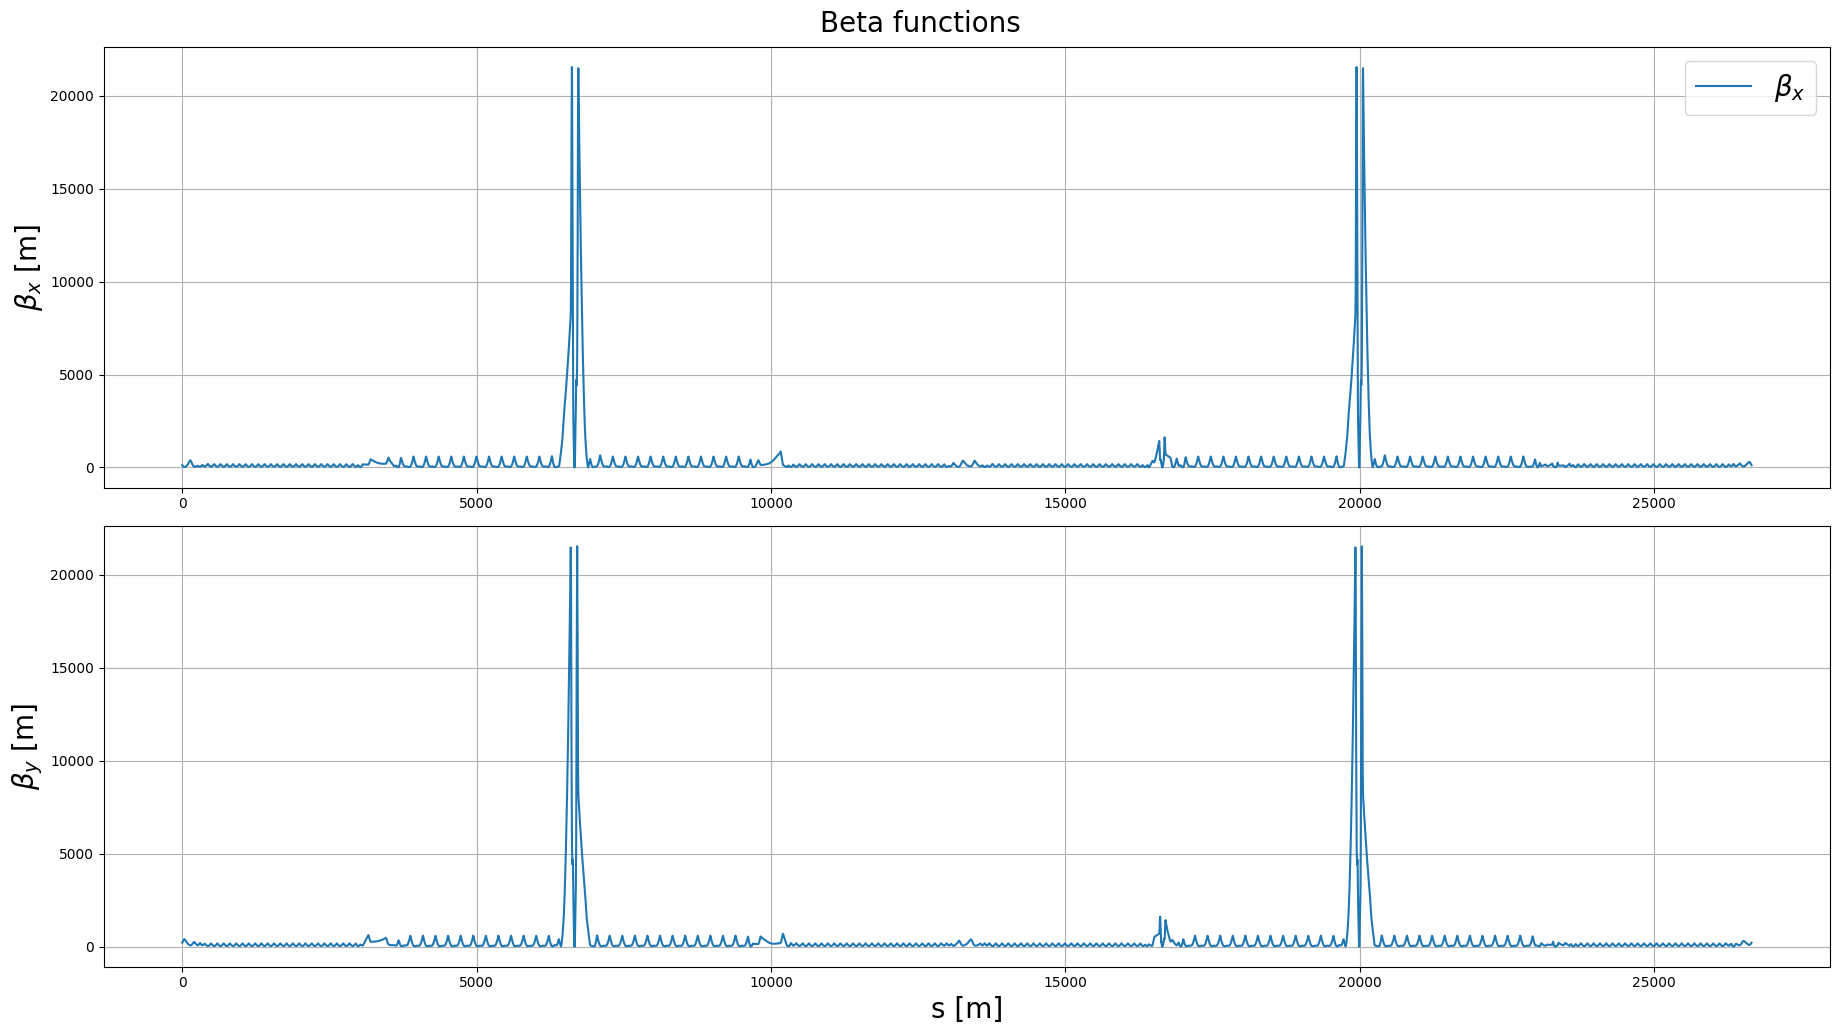

In [4]:
fig, ax = plt.subplots(2,1)
fig.set_size_inches(18.5, 10.5)
fontsize = 20
fig.suptitle('Beta functions',fontsize = fontsize )
ax[0].plot(twiss_b1['s'], twiss_b1['betx'], label = r'$\beta_{x}$')
ax[0].set_ylabel(r'$\beta_{x}$ [m]', fontsize = fontsize)
ax[0].grid()
ax[0].legend(fontsize = fontsize)

ax[1].plot(twiss_b1['s'], twiss_b1['bety'], label = r'$\beta_{y}$')
ax[1].set_ylabel(r'$\beta_{y}$ [m]', fontsize = fontsize)
ax[1].set_xlabel('s [m]', fontsize = fontsize)
ax[1].grid()
plt.tight_layout()

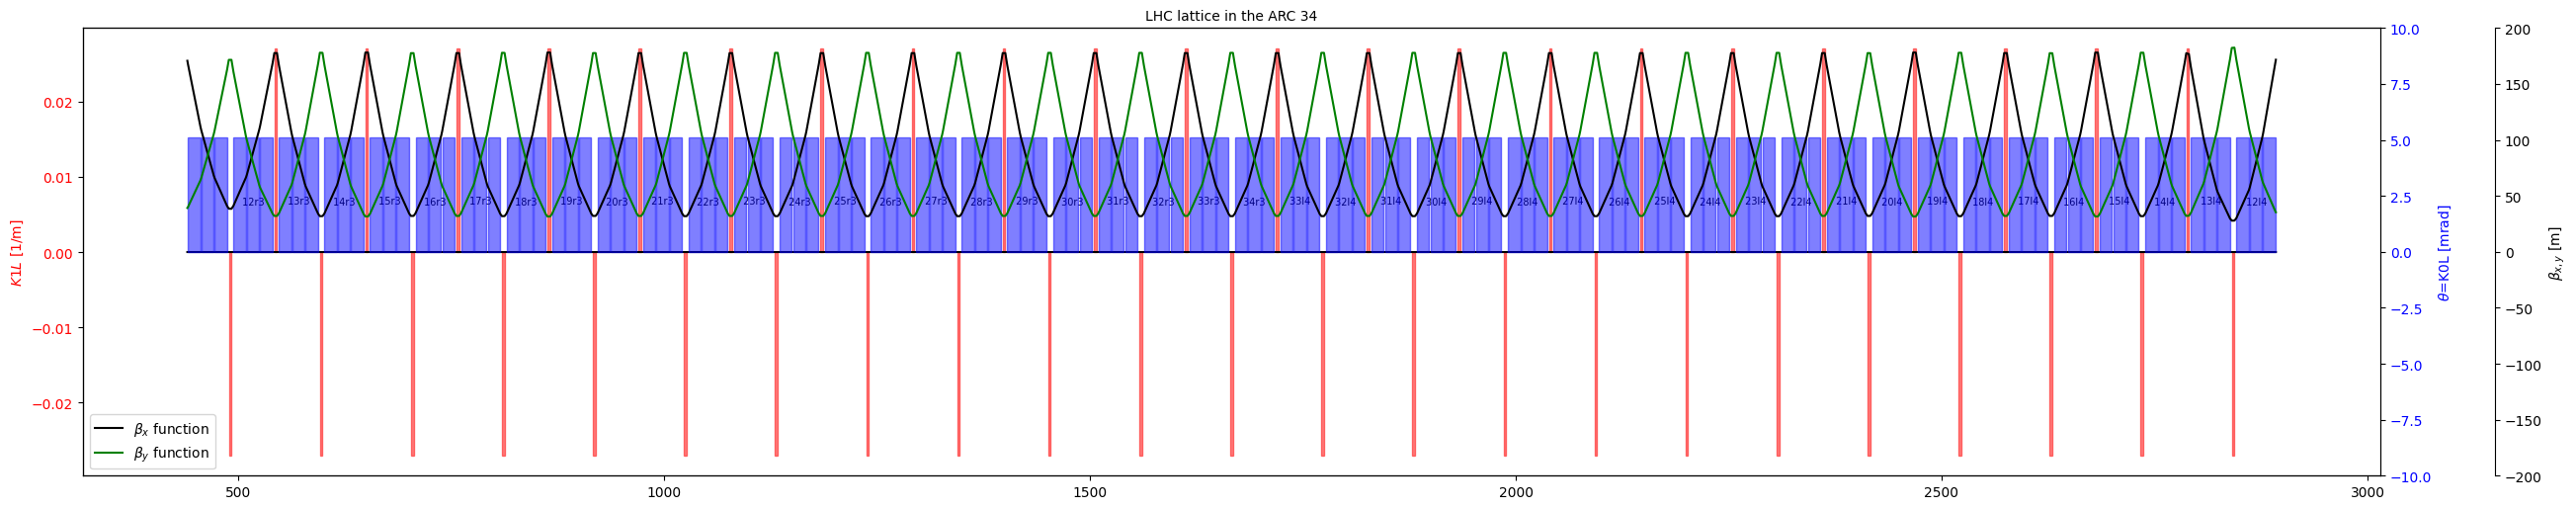

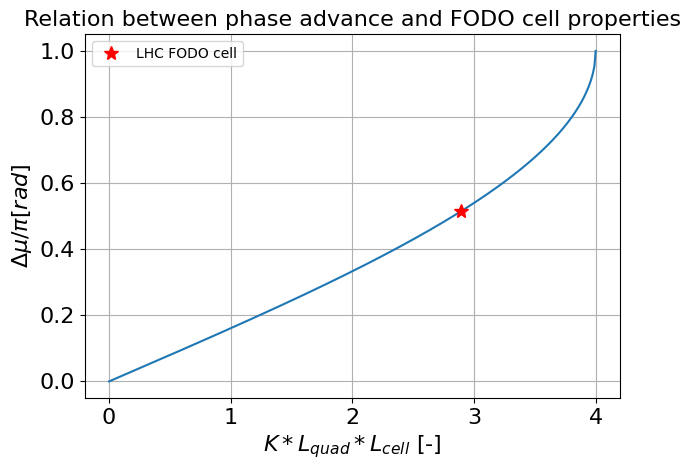

In [5]:
import matplotlib.patches as patches

def plotLatticeSeries(ax, twiss, element_name, series, height=1., v_offset=0., color='r',alpha=0.5):
    aux=series
    ax.add_patch(
    patches.Rectangle(
        (twiss_b1['s', element_name]-aux['length']*0, v_offset-height/2.),   # (x,y)
        aux['length'],          # width
        height,          # height
        color=color, alpha=alpha
    )
    )
    return;

my_dict = collider.lhcb1.to_dict()
# %%
# twiss_b1[:, ['s.arc.34.b1', 'e.arc.34.b1']]
fig = plt.figure(figsize=(30,20))

# set up subplot grid
#gridspec.GridSpec(3,3)
fontsize = 10
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(twiss_b1.rows['s.arc.34.b1':'e.arc.34.b1', ]['s'],0*twiss_b1.rows['s.arc.34.b1':'e.arc.34.b1', ]['s'],'k')
# plt.plot(twiss_b1.rows['s.arc.34.b1':'e.arc.34.b1', ]['s'][0:300],twiss_b1.rows['s.arc.34.b1':'e.arc.34.b1', ]['x'][0:300]*1e4,'green',label='x')


for ii in (twiss_b1.rows['s.arc.34.b1':'e.arc.34.b1', ]['name']):
    if((ii.startswith('mq.')) and ii.endswith('b1')):
        aux =my_dict['elements'][ii]
        k1l = my_dict['elements'][ii]['k1']*my_dict['elements'][ii]['length']
        plotLatticeSeries(plt.gca(),twiss_b1, ii, aux, height=k1l, v_offset=k1l/2, color='red')
        # add a label for each quadrupole on top of it with its name
        name = ' '+ii.split('.')[1]+' '
        plt.gca().text(twiss_b1['s', ii]+28.6, np.abs(k1l)/4, name, fontsize=7, horizontalalignment='center', verticalalignment='center')

ax1.set_ylabel(r'$K1L$ [1/m]', color='red')  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor='red')

FODO_cell_length = twiss_b1['s','mq.28l2.b1']-twiss_b1['s','mq.30l2.b1']
# fodo_cell = patches.Rectangle(( twiss_b1['s','mq.14r1.b1'], 0),
#                               FODO_cell_length, 1, linewidth=1, edgecolor='green', facecolor='green', alpha=0.5)

#ax1.set_xlim(twiss_b1.rows['s.arc.34.b1':'e.arc.34.b1', ]['s'][0],600)

ax2 = ax1.twinx() 
ax2.set_ylim(-10,10)
for ii in (twiss_b1.rows['s.arc.34.b1':'e.arc.34.b1', ]['name']):
    if((ii.startswith('mb.')) and ii.endswith('b1')):
        # print(ii)
        aux =my_dict['elements'][ii]
        kl = my_dict['elements'][ii]['k0']*my_dict['elements'][ii]['length']
        # retrieve only the part of the name between the dots
        plotLatticeSeries(plt.gca(),twiss_b1, ii, aux, height=kl*1000, v_offset=kl/2*1000, color='blue')
        # if(ii == 'mb.c15r3.b1'):
        #     break

# plt.gca().add_patch(fodo_cell)
# add a label for the FODO cell


color = 'blue'
ax2.set_ylabel(r'$\theta$=K0L [mrad]', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)

#add an axvline at the start of the FODO cell
#plt.gca().axvline(twiss_b1['s','mq.34r4.b1'], color='green', alpha = 0.4, label='FODO cell')

plt.title('LHC lattice in the ARC 34', fontsize = fontsize)
plt.xlabel('s [m]', fontsize = fontsize)
color = 'k'
ax3 = ax1.twinx() 
ax3.set_ylim(-200,200)
ax3.spines.right.set_position(("axes", 1.05))
plt.gca().plot(twiss_b1.rows['s.arc.34.b1':'e.arc.34.b1', ]['s'],
               twiss_b1.rows['s.arc.34.b1':'e.arc.34.b1', ]['betx'],'k',label=r'$\beta_{x}$ function')
plt.gca().plot(twiss_b1.rows['s.arc.34.b1':'e.arc.34.b1', ]['s'],
               twiss_b1.rows['s.arc.34.b1':'e.arc.34.b1', ]['bety'],'green',label=r'$\beta_{y}$ function')

ax3.set_ylabel(r'$\beta_{x,y}$ [m]', color=color)  # we already handled the x-label with ax1
ax3.tick_params(axis='y', labelcolor=color)
plt.legend(fontsize = fontsize)
#%%

x= np.arange(0,4.01,0.01)
y=2*np.arcsin(x/4)/np.pi
FODO_cell_length = twiss_b1['s','mq.28l2.b1']-twiss_b1['s','mq.30l2.b1']
LHCFODO = np.abs(k1l)*FODO_cell_length
y_LHC = 2*np.arcsin(LHCFODO/4)/np.pi
fig, ax1 = plt.subplots()
ax1.plot(x,y,'-')
ax1.set_ylabel("$\Delta \mu / \pi [rad]$", fontsize=16)
ax1.set_xlabel("$K*L_{quad}*L_{cell}$ [-]", fontsize=16)
ax1.grid()
ax1.tick_params(axis='both', labelsize=16)
phase_advance = np.abs((twiss_b1['mux','mq.30l2.b1']-twiss_b1['mux','mq.28l2.b1']))
ax1.plot(LHCFODO, y_LHC, '*', markersize=10, color='red', label='LHC FODO cell')
#find the point corresponding to y = 0.4
ax1.set_title('Relation between phase advance and FODO cell properties', fontsize=16)
ax1.legend(fontsize=10)


plt.tight_layout()